In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od

dataset_url = 'https://www.kaggle.com/datasets/angadchau/covid19-trial-finder-dataset'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: muhammadmustafashah
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/angadchau/covid19-trial-finder-dataset


100%|██████████| 235k/235k [00:00<00:00, 32.7MB/s]

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('/content/covid19-trial-finder-dataset/COVID-19_trial_semantic_tags_data.csv')
df.head()

,nct_id,entity_source_text,concept_id,concept_name,domain,start_index,end_index,temporal_source_text,days,numeric_source_text,numeric_att_min,numeric_att_max,is_exclusion
0,NCT04363437,diltiazem,1328165,Diltiazem,Drug,1662,1671,NaN,0,NaN,-99999.0,99999.0,1
1,NCT01306084,viral infection,440029,Viral disease,Condition,324,339,NaN,0,NaN,-99999.0,99999.0,0
2,NCT02735707,inotropes,723640,Positive Inotropic Agents,Drug,521,530,NaN,0,NaN,-99999.0,99999.0,0
3,NCT02735707,vasopressor,1507835,Vasopressin (USP),Drug,506,517,NaN,0,NaN,-99999.0,99999.0,0
4,NCT02735707,Non-invasive ventilatory support,44790095,Invasive ventilation,Procedure,438,482,Up to 48 hours after ICU admission,2,NaN,-99999.0,99999.0,0


In [8]:
# Check the data types and missing values
df.info()

# Summary statistics
df.describe()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10223 entries, 0 to 10222
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   nct_id                10223 non-null  object 
 1   entity_source_text    10223 non-null  object 
 2   concept_id            10223 non-null  int64  
 3   concept_name          10223 non-null  object 
 4   domain                10223 non-null  object 
 5   start_index           10223 non-null  int64  
 6   end_index             10223 non-null  int64  
 7   temporal_source_text  5273 non-null   object 
 8   days                  10223 non-null  int64  
 9   numeric_source_text   1752 non-null   object 
 10  numeric_att_min       10223 non-null  float64
 11  numeric_att_max       10223 non-null  float64
 12  is_exclusion          10223 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.0+ MB


,0
nct_id,0
entity_source_text,0
concept_id,0
concept_name,0
domain,0
start_index,0
end_index,0
temporal_source_text,4950
days,0
numeric_source_text,8471


In [9]:
# Identify numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

print("Numeric columns:", numeric_cols)
print("Non-numeric columns:", non_numeric_cols)

Numeric columns: Index(['concept_id', 'start_index', 'end_index', 'days', 'numeric_att_min',
       'numeric_att_max', 'is_exclusion'],
      dtype='object')
Non-numeric columns: Index(['nct_id', 'entity_source_text', 'concept_name', 'domain',
       'temporal_source_text', 'numeric_source_text'],
      dtype='object')


In [12]:
# Identify numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = df.select_dtypes(include=['object']).columns

print("Numeric columns:", numeric_cols)
print("Non-numeric columns:", non_numeric_cols)

Numeric columns: Index(['concept_id', 'start_index', 'end_index', 'days', 'numeric_att_min',
       'numeric_att_max', 'is_exclusion'],
      dtype='object')
Non-numeric columns: Index(['nct_id', 'entity_source_text', 'concept_name', 'domain',
       'temporal_source_text', 'numeric_source_text'],
      dtype='object')


In [13]:
# Impute missing values for numeric columns with mean
numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

In [14]:
# Impute missing values for non-numeric columns with the most frequent value
non_numeric_imputer = SimpleImputer(strategy='most_frequent')
df[non_numeric_cols] = non_numeric_imputer.fit_transform(df[non_numeric_cols])

In [15]:
# One-hot encode categorical columns
df = pd.get_dummies(df, columns=non_numeric_cols)

In [16]:
# Define target and features
target_column = 'is_exclusion'
X = df.drop(target_column, axis=1)
y = df[target_column]

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.89
Logistic Regression Confusion Matrix:
[[ 492  110]
 [ 108 1335]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82       602
         1.0       0.92      0.93      0.92      1443

    accuracy                           0.89      2045
   macro avg       0.87      0.87      0.87      2045
weighted avg       0.89      0.89      0.89      2045



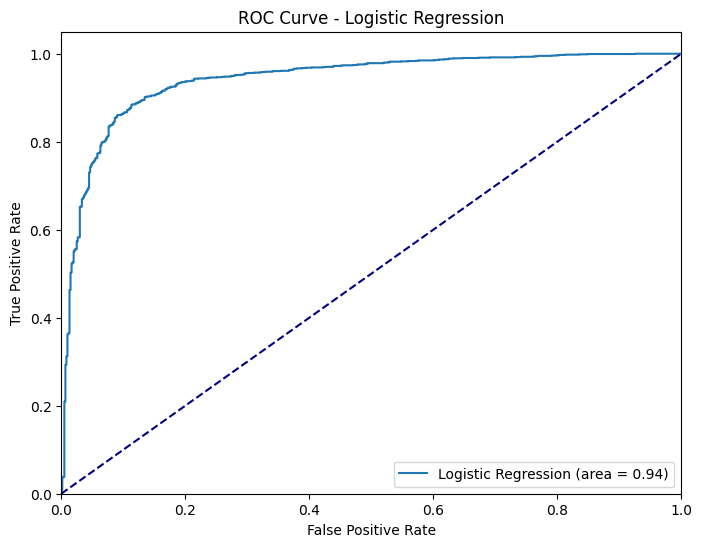

Random Forest Accuracy: 0.93
Random Forest Confusion Matrix:
[[ 522   80]
 [  72 1371]]
Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.87      0.87       602
         1.0       0.94      0.95      0.95      1443

    accuracy                           0.93      2045
   macro avg       0.91      0.91      0.91      2045
weighted avg       0.93      0.93      0.93      2045



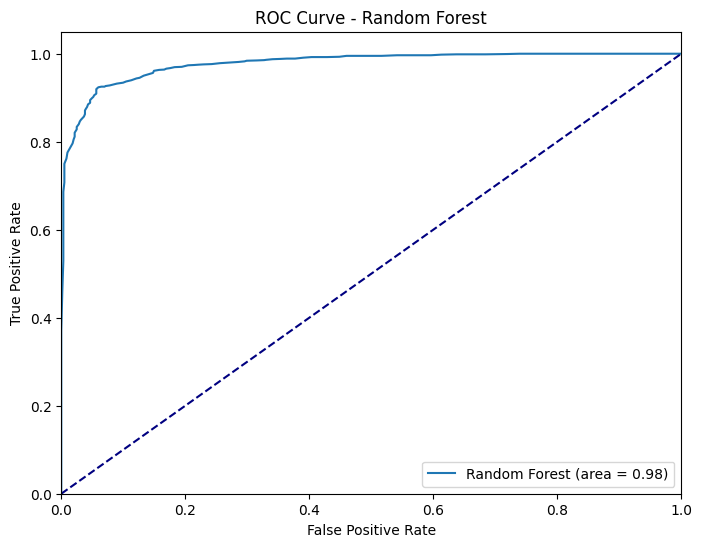

Gradient Boosting Accuracy: 0.87
Gradient Boosting Confusion Matrix:
[[ 439  163]
 [ 113 1330]]
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.73      0.76       602
         1.0       0.89      0.92      0.91      1443

    accuracy                           0.87      2045
   macro avg       0.84      0.83      0.83      2045
weighted avg       0.86      0.87      0.86      2045



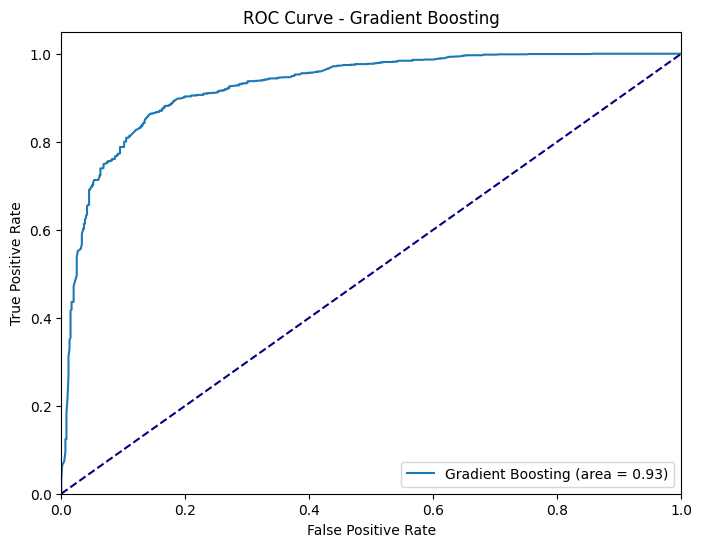

In [20]:
# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"{model_name} Accuracy: {accuracy:.2f}")
    print(f"{model_name} Confusion Matrix:\n{conf_matrix}")

    # Classification report
    print(f"{model_name} Classification Report:\n{classification_report(y_test, y_pred)}")

    # ROC Curve and AUC
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

In [21]:
# Choose the best model based on accuracy (or other metrics)
best_model = max(models.items(), key=lambda x: accuracy_score(y_test, x[1].predict(X_test)))[1]

In [26]:
# Choose the best model based on accuracy (or other metrics)
best_model_name, best_model = max(models.items(), key=lambda x: accuracy_score(y_test, x[1].predict(X_test)))

print(f"Best model is {best_model_name}")

Best model is Random Forest


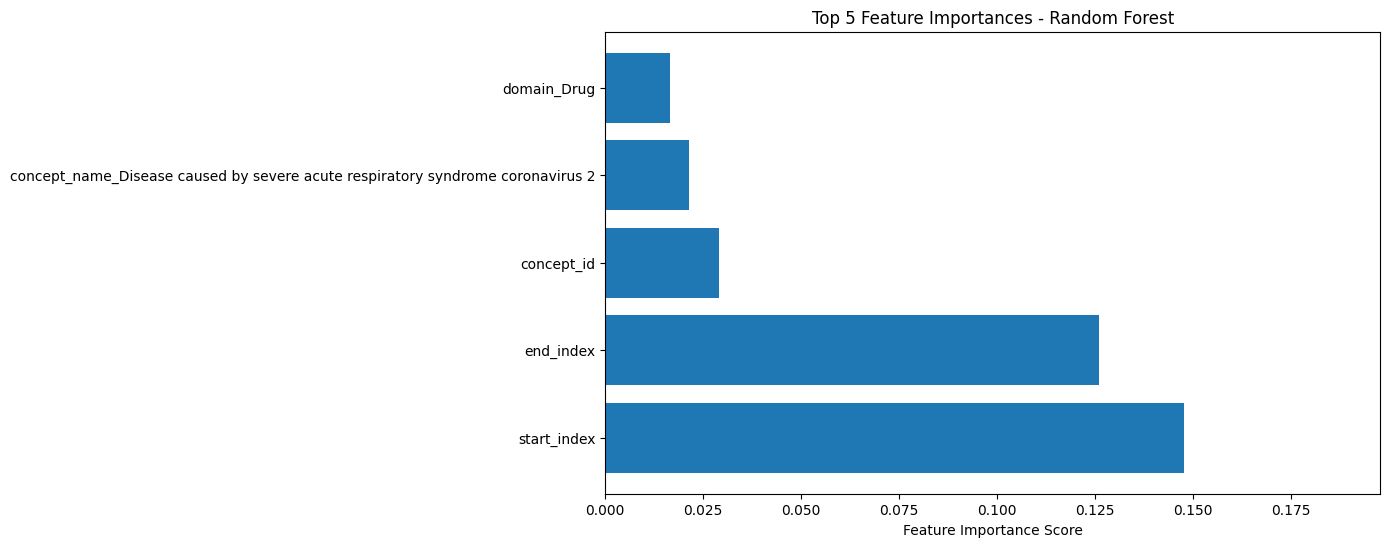

In [32]:
# Plot top 5 feature importances for the best model if applicable
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    indices = np.argsort(importances)[::-1][:5]  # Get indices of top 5 features

    top_features = X.columns[indices]
    top_importances = importances[indices]

    plt.figure(figsize=(10, 6))
    plt.title(f"Top 5 Feature Importances - {best_model_name}")
    plt.barh(top_features, top_importances, align="center")
    plt.xlabel("Feature Importance Score")
    plt.xlim([0, max(top_importances) + 0.05])  # Adding space for clarity
    plt.show()

In [33]:
# Function to allow user to input values and make predictions
def make_prediction():
    print("Please enter the following feature values:")
    new_data = {
        'concept_id': int(input("Enter concept_id: ")),
        'start_index': int(input("Enter start_index: ")),
        'end_index': int(input("Enter end_index: ")),
        'days': int(input("Enter days: ")),
        'numeric_att_min': float(input("Enter numeric_att_min: ")),
        'numeric_att_max': float(input("Enter numeric_att_max: ")),
        # Add other feature columns and their values as per the original dataframe structure
    }

    # Convert new data into DataFrame
    new_data_df = pd.DataFrame([new_data])

    # Apply the same preprocessing as the training data
    new_data_df = pd.get_dummies(new_data_df)
    new_data_df = new_data_df.reindex(columns=X.columns, fill_value=0)
    new_data_df = scaler.transform(new_data_df)

    # Predict using the best model
    prediction = best_model.predict(new_data_df)

    # Display the result
    result = "Successful" if prediction[0] == 1 else "Unsuccessful"
    print(f'The clinical trial prediction result is: {result}')

In [34]:
# Call the function to enter values and predict
make_prediction()


Please enter the following feature values:
Enter concept_id: 12
Enter start_index: 32
Enter end_index: 23
Enter days: 44
Enter numeric_att_min: 3.44
Enter numeric_att_max: 23.1
The clinical trial prediction result is: Unsuccessful
